In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
import datetime 
import pandas_datareader.data as web

In [7]:
start=datetime.datetime(2008,1,1)
end=datetime.datetime(2020,6,22)

In [10]:
Df=web.DataReader("GOLD","yahoo",start,end)

In [11]:
Df=Df[['Close']]

In [12]:
Df = Df.dropna()

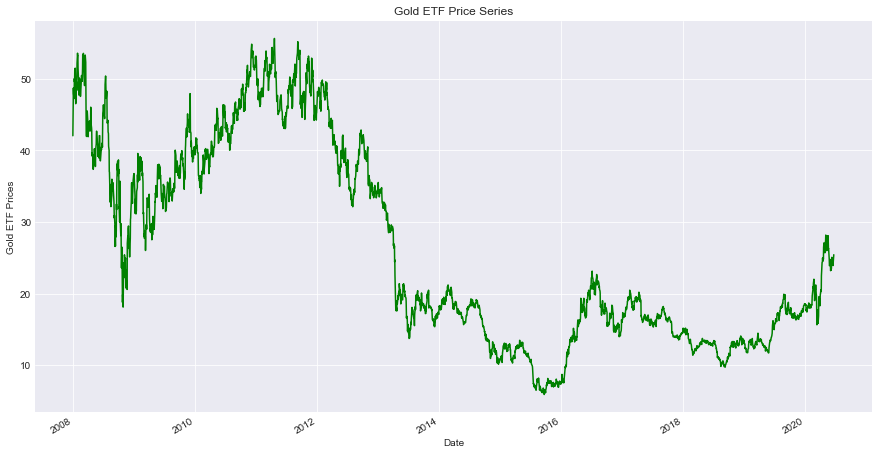

In [14]:
Df.Close.plot(figsize=(15,8),color='g')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [15]:
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

In [16]:
Df = Df.dropna()

In [17]:
X = Df[['S_3', 'S_9']]

In [18]:
y = Df['next_day_price']

In [19]:
t = .8

In [20]:
t = int(t*len(Df))

In [21]:
X_train = X[:t]
y_train = y[:t]

In [22]:
X_test = X[t:]
y_test = y[t:]

In [23]:
linear = LinearRegression().fit(X_train, y_train)

In [25]:
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.19 * 3 Days Moving Average (x1) + -0.19 * 9 Days Moving Average (x2) + 0.08 (constant)


In [26]:
predicted_price = linear.predict(X_test)

In [27]:
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

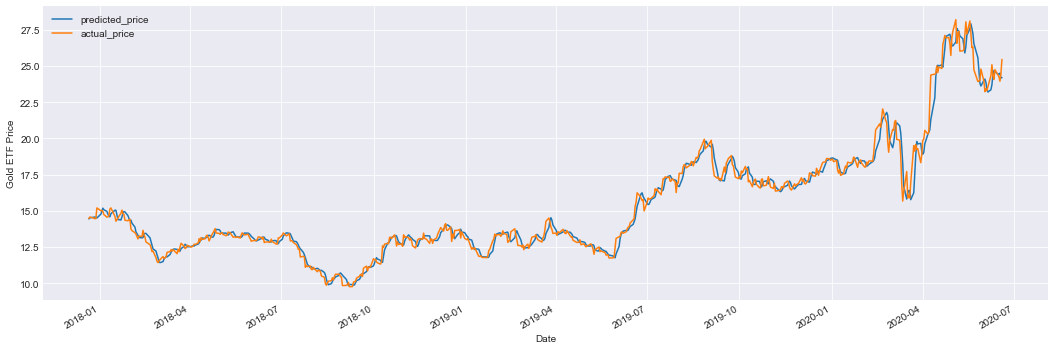

In [29]:
predicted_price.plot(figsize=(18,6))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [30]:
score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(score))

98.28

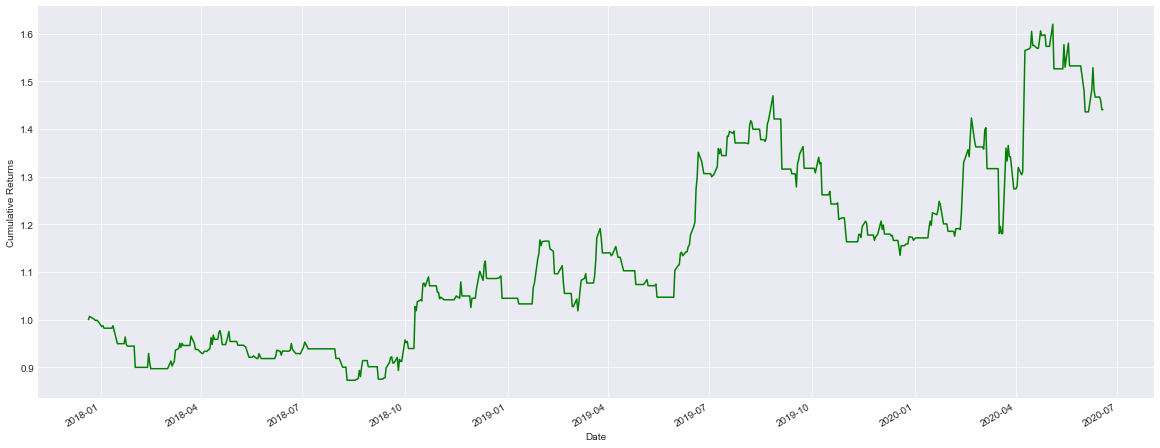

In [32]:
gold = pd.DataFrame()
gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(20,8),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [33]:
'Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5))

'Sharpe Ratio 0.68'

In [36]:
data=web.DataReader("GOLD","yahoo",start,end,)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data.tail(7)

,High,Low,Open,Close,Volume,Adj Close,S_3,S_9,predicted_gold_price,signal
Date,,,,,,,,,,
2020-06-12,24.910000,23.910000,24.650000,24.070000,15303700.0,24.070000,24.486666,23.915556,24.589746,No Position
2020-06-15,24.820000,23.090000,23.500000,24.740000,15853500.0,24.740000,24.373333,24.003333,24.438316,No Position
2020-06-16,24.910000,24.120001,24.420000,24.379999,16296600.0,24.379999,24.396666,24.132222,24.441371,Buy
2020-06-17,24.790001,24.100000,24.480000,24.250000,9226300.0,24.250000,24.456666,24.223333,24.495213,Buy
2020-06-18,24.430000,23.840000,24.200001,23.940001,12574700.0,23.940001,24.190000,24.295555,24.164609,No Position
2020-06-19,24.840000,24.100000,24.250000,24.490000,19198700.0,24.490000,24.226667,24.398889,24.188393,Buy
2020-06-22,25.860001,25.010000,25.110001,25.450001,17414300.0,25.450001,24.626667,24.523333,24.639757,Buy
